In [117]:
import numpy as np
import matplotlib.pyplot as plt

class Box():
    """Box defines a square in the occupancy grid that has an obstacle"""
    def __init__(self, x, y):
        self.x, self.y = x,y

class Obstacle():
    """Obstacle contains all of the occupied boxes in the grid for one obstacle"""
    def __init__(self, start_box, num_boxes, x_bound, y_bound):
        self.boxes = [start_box]
        self.num_boxes = num_boxes
        self.generate(x_bound, y_bound)

    def generate(self, x_bound, y_bound):
        for _ in range(self.num_boxes-1):
            self.add(x_bound, y_bound)

    def checkPlacements(self, box, x_bound, y_bound):
        print(box.x, box.y)
        # Check right
        free_right = True
        if box.x + 1 >= x_bound or any([other_box.y == box.y and other_box.x == box.x+1 for other_box in self.boxes]):
            free_right = False
        # Check left
        free_left = True
        if box.x - 1 < 0 or any([other_box.y == box.y and other_box.x == box.x-1 for other_box in self.boxes]):
            free_left = False
        # Check up
        print("Check up")
        print("box.x, box.y", box.x, box.y)
        print("box.y+1 >= y_bound", box.y+1 >= y_bound)
        print("box.y+1, y_bound", box.y+1, y_bound)
        print("any", any([other_box.y == box.y+1 for other_box in self.boxes]))
        free_up = True
        if box.y + 1 >= y_bound or any([other_box.x == box.x and other_box.y == box.y+1 for other_box in self.boxes]):
            free_up = False
        # Check down
        free_down = True
        if box.y -1 < 0 or any([other_box.x == box.x and other_box.y == box.y-1 for other_box in self.boxes]):
            free_down = False
        free_places = [free_right, free_left, free_up, free_down]
        return free_places

    def getBoxPlacements(self,x_bound, y_bound):
        # Filter out boxes that are surrounded on all sides by other boxes or the map boundary
        filtered_boxes = []
        free_placements = []
        for box in self.boxes:
            free_places = self.checkPlacements(box, x_bound, y_bound)
            if any(free_places):
                filtered_boxes.append(box)
                free_placements.append(free_places)
        return filtered_boxes, free_placements

    def add(self, x_bound, y_bound):
        """Add a box building from existing boxes"""
        filtered_boxes, free_placements = self.getBoxPlacements(x_bound, y_bound)
        # If you have no valid placements. Give up
        if len(filtered_boxes) == 0:
            return None
        # Now pick where to add a box
        box_datas = [(box, place) for box, place in zip(filtered_boxes, free_placements)]
        box_data_id = np.random.choice(list(range(len(box_datas))))
        root_box, places = box_datas[box_data_id][0], box_datas[box_data_id][1]
        choices = ['right', 'left', 'up', 'down']
        valid_choices = []
        for choice, place in zip(choices, places):
            if place:
                valid_choices.append(choice)
        # We chose where to put it
        chosen = np.random.choice(valid_choices)
        delta = np.array([0,0])
        if chosen == 'right':
            delta[0]+=1
        elif chosen == 'left':
            delta[0]-=1
        elif chosen == 'up':
            delta[1]+=1
        elif chosen == 'down':
            delta[1]-=1
        # Create the box
        box = Box(x=root_box.x+delta[0], y=root_box.y+delta[1])
        # Add the box, finally
        self.boxes.append(box)

[(5, 5), (5, 6), (5, 7), (5, 8), (6, 6), (7, 6), (8, 6)]
5 5
Check up
box.x, box.y 5 5
box.y+1 >= y_bound False
box.y+1, y_bound 6 10
any True
5 6
Check up
box.x, box.y 5 6
box.y+1 >= y_bound False
box.y+1, y_bound 7 10
any True
5 7
Check up
box.x, box.y 5 7
box.y+1 >= y_bound False
box.y+1, y_bound 8 10
any True
5 8
Check up
box.x, box.y 5 8
box.y+1 >= y_bound False
box.y+1, y_bound 9 10
any False
6 6
Check up
box.x, box.y 6 6
box.y+1 >= y_bound False
box.y+1, y_bound 7 10
any True
7 6
Check up
box.x, box.y 7 6
box.y+1 >= y_bound False
box.y+1, y_bound 7 10
any True
8 6
Check up
box.x, box.y 8 6
box.y+1 >= y_bound False
box.y+1, y_bound 7 10
any True
5 5 [True, True, False, True]
5 6 [False, True, False, False]
5 7 [True, True, False, False]
5 8 [True, True, True, False]
6 6 [False, False, True, True]
7 6 [False, False, True, True]
8 6 [True, False, True, True]


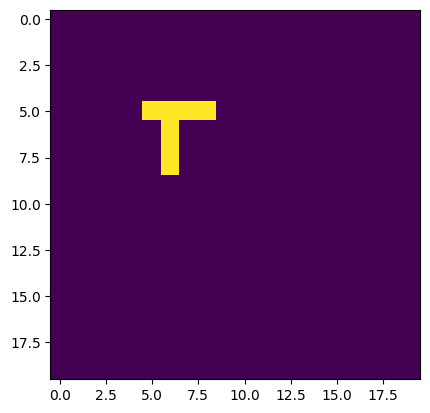

In [118]:
"""Tests"""
# box = Box(x=9,y=9)
# obstacle = Obstacle(box, 0, x_bound=10, y_bound=10)
# obstacle.checkPlacements(box, 10, 10)

boxes = [
    Box(5,5),
    Box(5,6),
    Box(5,7),
    Box(5,8),
    Box(6,6),
    Box(7,6),
    Box(8,6)
]

obstacle = Obstacle(box,0,20,20)
print([(box.x, box.y) for box in boxes])
obstacle.boxes = boxes

occupancy_grid = np.zeros((20,20))
for box in obstacle.boxes:
    occupancy_grid[box.x, box.y] = 1

filtered_boxes, free_placements = obstacle.getBoxPlacements(10,10)
for box, free_place in zip(filtered_boxes, free_placements):
    print(box.x, box.y, free_place)

plt.imshow(occupancy_grid)

7 11
Check up
box.x, box.y 7 11
box.y+1 >= y_bound False
box.y+1, y_bound 12 100
any False
7 11
Check up
box.x, box.y 7 11
box.y+1 >= y_bound False
box.y+1, y_bound 12 100
any False
8 11
Check up
box.x, box.y 8 11
box.y+1 >= y_bound False
box.y+1, y_bound 12 100
any False
7 11
Check up
box.x, box.y 7 11
box.y+1 >= y_bound False
box.y+1, y_bound 12 100
any False
8 11
Check up
box.x, box.y 8 11
box.y+1 >= y_bound False
box.y+1, y_bound 12 100
any False
6 11
Check up
box.x, box.y 6 11
box.y+1 >= y_bound False
box.y+1, y_bound 12 100
any False
7 11
Check up
box.x, box.y 7 11
box.y+1 >= y_bound False
box.y+1, y_bound 12 100
any False
8 11
Check up
box.x, box.y 8 11
box.y+1 >= y_bound False
box.y+1, y_bound 12 100
any False
6 11
Check up
box.x, box.y 6 11
box.y+1 >= y_bound False
box.y+1, y_bound 12 100
any False
7 10
Check up
box.x, box.y 7 10
box.y+1 >= y_bound False
box.y+1, y_bound 11 100
any True
7 11
Check up
box.x, box.y 7 11
box.y+1 >= y_bound False
box.y+1, y_bound 12 100
any False


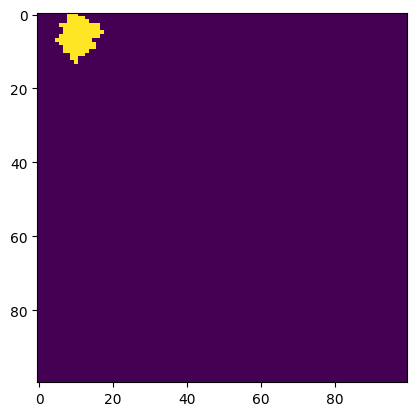

In [119]:
# Generate obstacles in an occupancy grid
x_bound = 100
y_bound = 100
occupancy_grid = np.zeros((100,100))

# Pick where to place obstacles
num_obstacles = 1
num_boxes = 100
xs = np.random.uniform(0, x_bound, num_obstacles).astype(int)
ys = np.random.uniform(0, y_bound, num_obstacles).astype(int)

# Generate obstacles
obstacles = [Obstacle(Box(x,y), num_boxes, x_bound, y_bound) for x,y in zip(xs, ys)]

# Fill the occupancy grid
for obstacle in obstacles:
    for box in obstacle.boxes:
        occupancy_grid[box.x, box.y] = 1

plt.imshow(occupancy_grid)

[<__main__.Box object at 0x780c044ddd20>, <__main__.Box object at 0x780c044dd390>, <__main__.Box object at 0x780c044dd300>, <__main__.Box object at 0x780c044df1f0>, <__main__.Box object at 0x780c044df250>, <__main__.Box object at 0x780c044dde10>, <__main__.Box object at 0x780c044df370>, <__main__.Box object at 0x780c044ddde0>, <__main__.Box object at 0x780c044df580>, <__main__.Box object at 0x780c044defe0>]
9 54
9 54
9 54
9 54
9 54
9 54
9 54
9 54
9 54
9 54
